<a href="https://colab.research.google.com/github/Ankit6539/ALMABETTERGIT/blob/main/Company_Bankruptcy_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Classification project of COMPANY BANKRUPTCY PREDICTION**

Prediction of Bankruptcy is a phenomenon of increasing interest to firms who stand to loose money because on unpaid debts. Since computers can store huge datasets pertaining to bankruptcy, making accurate predictions from them before hand is becoming important.

The data used in this project has been collected from the Taiwan Economic Journal for the years 1999 to 2009. Company Bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

In this project we will use various classification algorithms on bankruptcy dataset to predict bankruptcies with satisfying accuracies long before the actual event

Contribution - Self

## Importing Packages and Data

In [ ]:
# Import the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [ ]:

# Read in the dataset
data = pd.read_csv('/content/drive/MyDrive/COMPANY BANKRUPTCY PREDICTION.csv')

In [ ]:

# Print the shape and head of the DataFrame
print(data.shape)
data.head(5)

(6819, 96)


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


## **Data Analysis and Visualizations**

In [ ]:

# Explore the Descriptive Statistics of the data
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [ ]:

# Look out for Null/NaN values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

0    6599
1     220
Name: Bankrupt?, dtype: int64


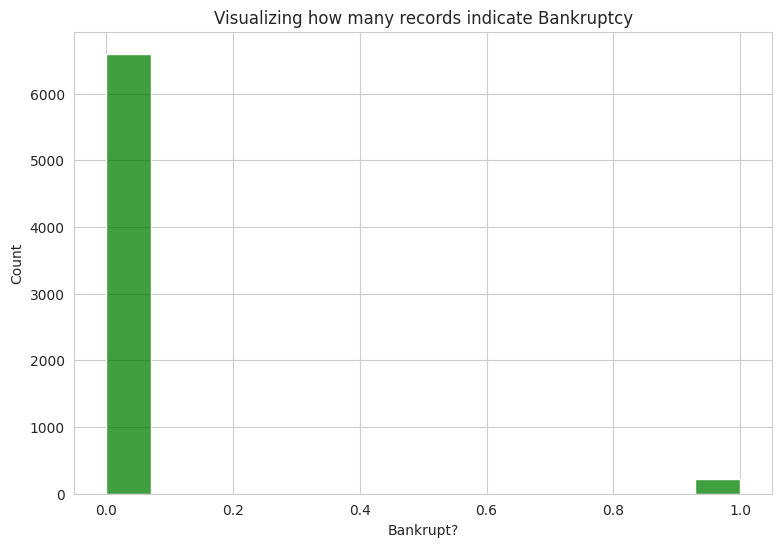

In [ ]:
# Visualize how many records indicate Bankruptcy
print(data['Bankrupt?'].value_counts())

sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(9,6)

sns.histplot(data['Bankrupt?'],color='green')
plt.title('Visualizing how many records indicate Bankruptcy')
plt.show()


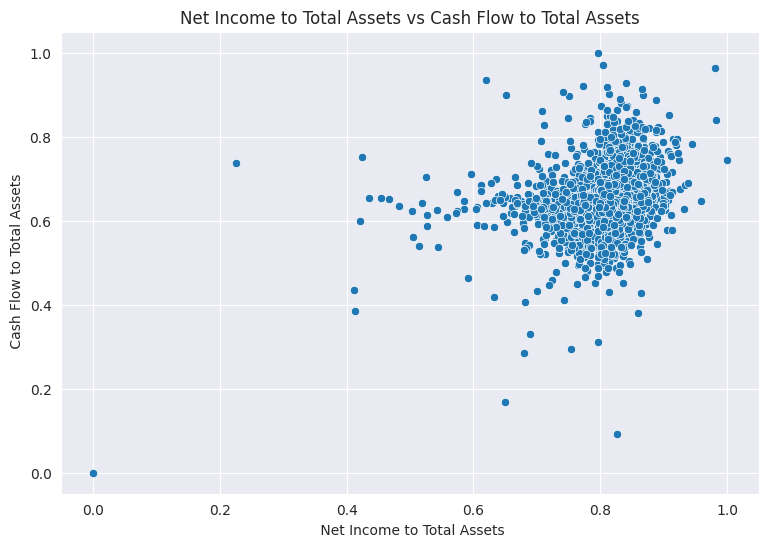

In [ ]:

# Explore relation b/w Net Income to Total Assets and Cash Flow to Total Assets
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(9,6)

sns.scatterplot(x=' Net Income to Total Assets', y=' Cash Flow to Total Assets',	data=data)
plt.title('Net Income to Total Assets vs Cash Flow to Total Assets')
plt.show()

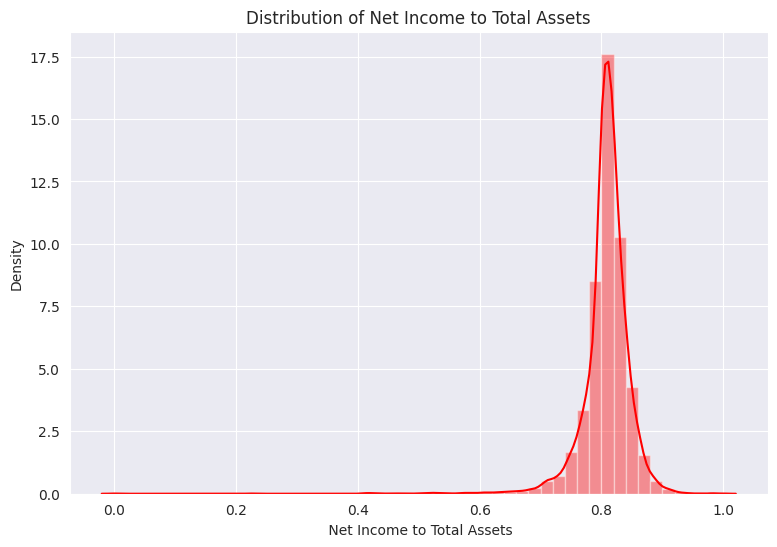

In [ ]:

# Visualize the distribution of Net Income to Total Assets
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(9,6)

ax = sns.distplot(data[' Net Income to Total Assets'],color='red')
plt.title('Distribution of Net Income to Total Assets')
plt.show()

# Dimensionality Reduction
# The Data consists of 6819 records with 96 columns! This huge number of columns make it really difficult for modelling and predictions. So, we reduce the dimensions of the data using Principal Component Analysis

In [ ]:

# Initialize PCA with required number of components and fit_transform the data
pca = PCA(n_components=25)
reduced_data = pca.fit_transform(data.drop('Bankrupt?',axis=1))
reduced_data.shape

(6819, 25)

In [ ]:

# Create a new DataFrame with the reduced data
new_data = pd.concat([data['Bankrupt?'],pd.DataFrame(reduced_data)],axis=1)

In [ ]:

# Print the head of the new DataFrame
new_data.head(5)

,Bankrupt?,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,1,2.165330e+09,-3.814949e+07,-3.237615e+09,-2.063212e+09,-1.969494e+09,-1.410239e+09,-8.723455e+08,-3.342048e+09,-6.724872e+07,...,-1.608745e+07,-1.082433e+07,-9.594431e+06,-3.684855e+06,-3.477068e+06,-1.427628e+07,-7.717010e+05,-1.784430e+06,-863266.256808,0.439582
1,1,4.902366e+08,8.463795e+09,8.746100e+08,-3.292132e+09,-1.383796e+09,-1.194097e+09,-2.313543e+08,-2.330575e+09,3.305436e+07,...,-1.966260e+06,-4.013065e+06,3.392343e+05,-3.207236e+06,-1.615297e+06,-1.379980e+07,7.903678e+05,-8.018587e+03,117114.426014,0.723937
2,1,-2.620138e+09,-2.169966e+09,-1.239416e+09,8.771527e+08,-2.812465e+09,-1.582306e+09,1.654892e+09,-4.584627e+08,-2.737372e+08,...,-4.957818e+08,-4.983363e+06,-7.351532e+06,2.688157e+06,-2.636936e+06,-8.994466e+05,-5.664120e+07,5.083825e+06,-900147.997862,0.249851
3,1,3.249284e+09,5.987899e+09,-2.180465e+09,-4.385660e+09,-2.566962e+09,1.061380e+09,7.876119e+09,4.758288e+09,-5.484820e+07,...,1.379922e+07,1.078678e+06,-8.624433e+06,1.927873e+06,-1.874867e+07,-1.234257e+06,3.214677e+06,1.744171e+06,541452.036057,-0.113370
4,1,7.604602e+09,-2.951427e+09,2.267775e+09,-2.370486e+09,-1.647314e+09,-3.956955e+08,-4.681061e+08,2.215795e+09,-7.627852e+07,...,-7.522076e+06,-2.229420e+06,-7.863227e+05,5.570674e+05,-2.746428e+06,-1.548594e+07,8.544160e+05,-6.655064e+05,-282772.691969,-0.045536


## **Over Sampling**

In [ ]:

# Pick relevant Independent & Dependent Variables
x = new_data.drop('Bankrupt?',axis=1)
y = new_data['Bankrupt?']

In [ ]:

# Perform Over Sampling of Data using Synthetic Minority Oversampling Technique(SMOTE)
oversample = SMOTE()
x_over, y_over = oversample.fit_resample(x,y)

print(np.unique(y_over,return_counts=True))

(array([0, 1]), array([6599, 6599]))


### **Classification Modelling**

In [ ]:

# Scale the data using StandardScaler
s = StandardScaler()
s.fit(x_over)
x_over_scaled = s.transform(x_over)
x_train, x_test, y_train, y_test = train_test_split(x_over_scaled,y_over,test_size=0.2)

** PERFORMANCE METRICS OF LOGISTIC REGRESSION **

Best Parameters for Logistic Regression:  {'C': 0.5, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 61.17%
F1_Score:  0.611


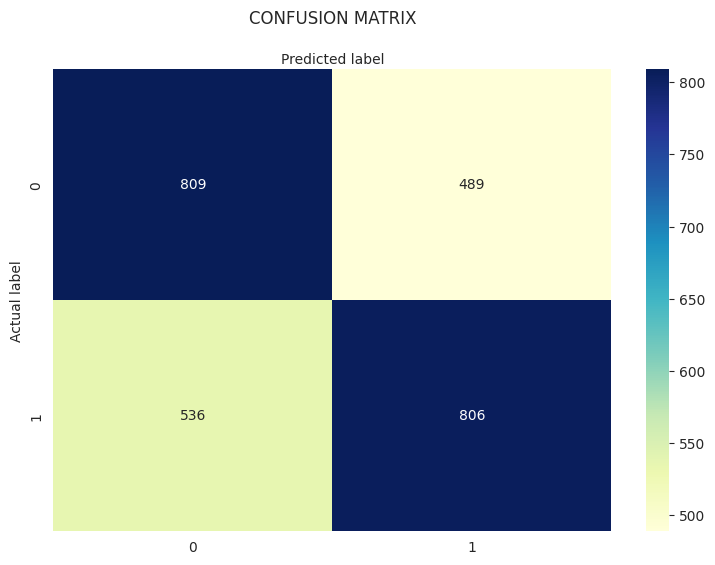

In [ ]:
# Classification using Logistic Regression along with Hyperparameter Tuning
param_grid = {'penalty':['l2','elasticnet'],'solver':['lbfgs','saga'],'C':[0.01,0.5]}

log_reg = LogisticRegression(max_iter=10000)
log_reg_cv = GridSearchCV(log_reg,param_grid,cv=3)
log_reg_cv.fit(x_over_scaled,y_over)

print('** PERFORMANCE METRICS OF LOGISTIC REGRESSION **\n')
pred1 = log_reg_cv.predict(x_test)
print('Best Parameters for Logistic Regression: ',log_reg_cv.best_params_)
print('Accuracy: {}%'.format(round(accuracy_score(y_test, pred1)*100,2)))
print('F1_Score: ',round(f1_score(y_test, pred1),3))

fig, ax = plt.subplots()
fig.set_size_inches(9,6)
ax = sns.heatmap(pd.DataFrame(confusion_matrix(y_test, pred1)), annot=True, cmap="YlGnBu", fmt='g')
plt.title('CONFUSION MATRIX\n')
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

** PERFORMANCE METRICS OF SVC **

Accuracy: 86.48%
F1_Score:  0.868


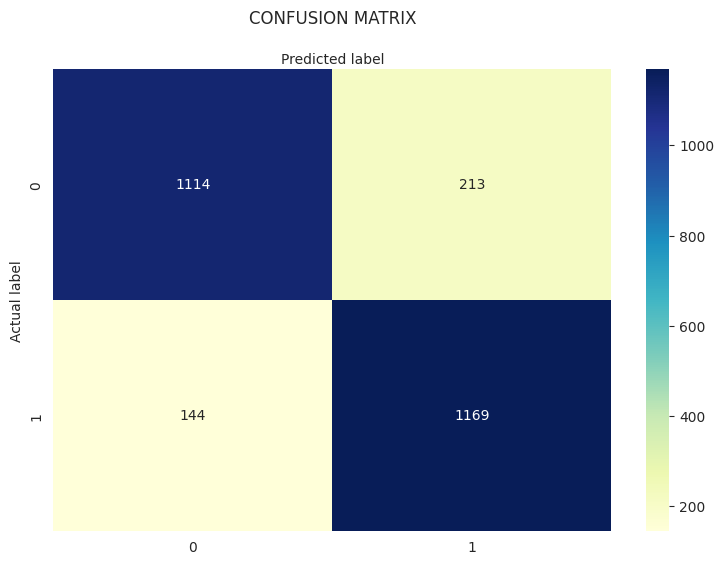

In [ ]:
# Classification using Support Vector Machines
x_train, x_test, y_train, y_test = train_test_split(x_over,y_over,test_size=0.2)

svc = SVC()
svc.fit(x_over,y_over)
pred2 = svc.predict(x_test)

print('** PERFORMANCE METRICS OF SVC **')
print('\nAccuracy: {}%'.format(round(accuracy_score(y_test, pred2)*100,2)))
print('F1_Score: ',round(f1_score(y_test, pred2),3))

fig, ax = plt.subplots()
fig.set_size_inches(9,6)
ax = sns.heatmap(pd.DataFrame(confusion_matrix(y_test, pred2)), annot=True, cmap="YlGnBu", fmt='g')
plt.title('CONFUSION MATRIX\n')
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


** PERFORMANCE METRICS OF RANDOM FOREST CLASSIFIER **

Accuracy: 96.14%
F1_Score:  0.963


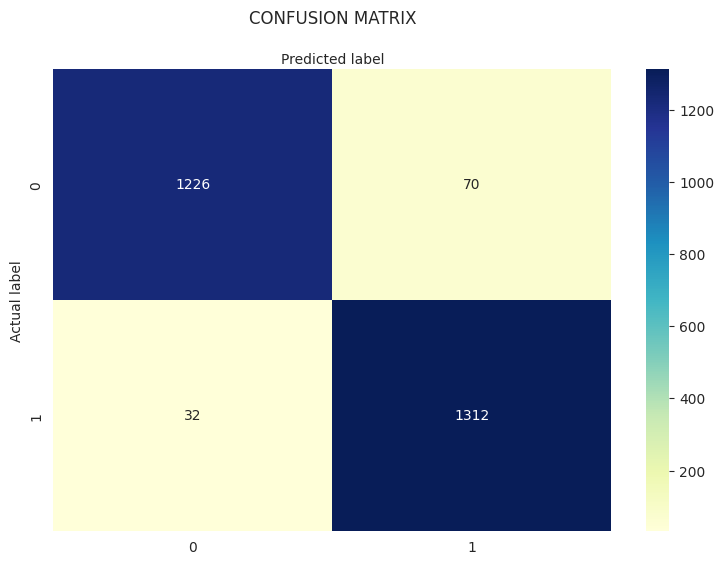

In [ ]:
# Classification using RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(x_over,y_over,test_size=0.2)

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
pred3 = rfc.predict(x_test)

print('** PERFORMANCE METRICS OF RANDOM FOREST CLASSIFIER **')
print('\nAccuracy: {}%'.format(round(accuracy_score(y_test, pred3)*100,2)))
print('F1_Score: ',round(f1_score(y_test, pred3),3))

fig, ax = plt.subplots()
fig.set_size_inches(9,6)
ax = sns.heatmap(pd.DataFrame(confusion_matrix(y_test, pred3)), annot=True, cmap="YlGnBu", fmt='g')
plt.title('CONFUSION MATRIX\n')
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# **Conclusions**

The following observations and conclusions have been made through the above visualizations and predictions:

**1- The Data suffers from severe Class Imbalance. In order to address this issue, the minority class has been oversampled using SMOTE technique.**

**2- The Logistic Regression algorithm has the least performance metrics with an accuracy of 61.9%. This is so because Logistic Regression is type of Linear Classification algorithm.**

**3-** **Random Forest Regressor has the most efficient performance metrics with an accuracy of 96.9%**